# **Chapter 4. Python 을 활용한 데이터 시각화** 





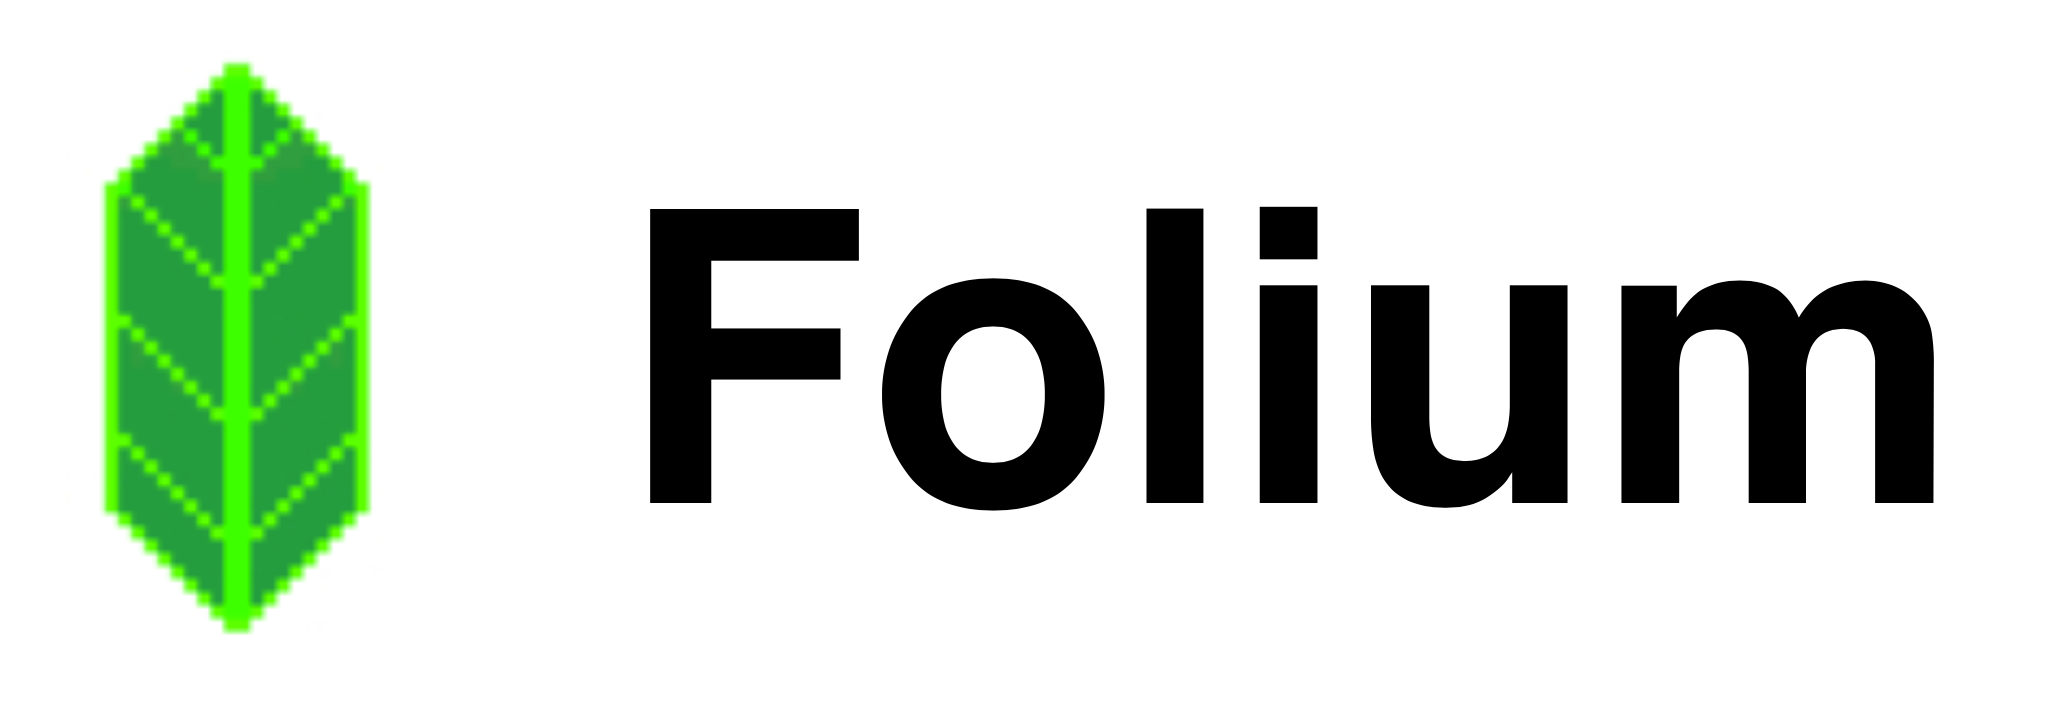


---
### **학습 목표**
> 4-1. matplotlib 이란? <br>
> 4-2. matplotlib 구성 요소와 기본 그래프 <br>
> 4-3. matplotlib 그래프 유형 별 시각화 <br>
> 4-4. seaborn 이란? <br>
> 4-5. matplotlib 과 seaborn <br>
> 4-6. seaborn 그래프 유형 별 시각화 <br>
> 4-7. folium 이란? <br>
> 4-8. folium 기본 사용법 <br>
> **4-9. folium 지도 데이터 시각화 실습**

> Colab 한글 깨짐 현상 해결 방법
> - Step 1. 폰트 설치 (아래 코드 실행)
> - Step 2. 런타임 재시작 (런타임 > 런타임 다시 시작)
> - Step 3. 라이브러리 임포트 (폰트 설치 이후 코드 실행)

In [25]:
# 폰트 설치
!apt-get update -qq
!apt-get install fonts-nanum* -qq
!rm ~/.cache/matplotlib -rf

Selecting previously unselected package fonts-nanum.
(Reading database ... 155320 files and directories currently installed.)
Preparing to unpack .../fonts-nanum_20170925-1_all.deb ...
Unpacking fonts-nanum (20170925-1) ...
Selecting previously unselected package fonts-nanum-eco.
Preparing to unpack .../fonts-nanum-eco_1.000-6_all.deb ...
Unpacking fonts-nanum-eco (1.000-6) ...
Selecting previously unselected package fonts-nanum-extra.
Preparing to unpack .../fonts-nanum-extra_20170925-1_all.deb ...
Unpacking fonts-nanum-extra (20170925-1) ...
Selecting previously unselected package fonts-nanum-coding.
Preparing to unpack .../fonts-nanum-coding_2.5-1_all.deb ...
Unpacking fonts-nanum-coding (2.5-1) ...
Setting up fonts-nanum-extra (20170925-1) ...
Setting up fonts-nanum (20170925-1) ...
Setting up fonts-nanum-coding (2.5-1) ...
Setting up fonts-nanum-eco (1.000-6) ...
Processing triggers for fontconfig (2.12.6-0ubuntu2) ...


## 4-9. folium 지도 데이터 시각화 실습

> - 이번 시간에는 **folium 을 사용해 서울시 상권 분석 실습** 을 합니다.
> - [공공데이터 포털](https://www.data.go.kr/index.do)
> - 다운로드 : [소상공인시장진흥공단_상가(상권)정보_서울.csv](https://docs.google.com/uc?export=download&id=1G3jkVS_5cRAb5Ks5KSLJR0bWtH4dxIGA)

In [24]:
# 라이브러리 불러오기
import folium
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
import matplotlib as mpl 
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

# 폰트 설정
path = '/usr/share/fonts/truetype/nanum/NanumGothic.ttf' # 나눔 고딕
font_name = fm.FontProperties(fname=path, size=20).get_name() # 기본 폰트 사이즈 : 20
plt.rc('font', family=font_name)
fm._rebuild()
mpl.rcParams['axes.unicode_minus'] = False
%matplotlib inline

In [5]:
# 드라이브 마운트
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [5]:
# 실습 데이터 로딩
df = pd.read_csv('/content/drive/MyDrive/00_fastcampus/04_visualization/소상공인시장진흥공단_상가(상권)정보_서울.csv')

> ###  **4-9-1. 상권 데이터 세트 준비**

> - 지도 시각화를 위한 **데이터 준비**를 합니다.
> - 필요한 정보만 필터링하고, 결측값이 없는지 확인합니다.

In [6]:
df.head(1)

,상가업소번호,상호명,지점명,상권업종대분류코드,상권업종대분류명,상권업종중분류코드,상권업종중분류명,상권업종소분류코드,상권업종소분류명,표준산업분류코드,표준산업분류명,시도코드,시도명,시군구코드,시군구명,행정동코드,행정동명,법정동코드,법정동명,지번코드,대지구분코드,대지구분명,지번본번지,지번부번지,지번주소,도로명코드,도로명,건물본번지,건물부번지,건물관리번호,건물명,도로명주소,구우편번호,신우편번호,동정보,층정보,호정보,경도,위도
0,23324279,제중건강원,NaN,D,소매,D10,건강/미용식품,D10A07,건강원,G47216,건강보조식품 소매업,11,서울특별시,11560,영등포구,1156053500,영등포동,1156010600,영등포동5가,1156010600100410001,1,대지,41,1.0,서울특별시 영등포구 영등포동5가 41-1,115604154799,서울특별시 영등포구 영중로14길,11,17.0,1156010600100410002034626,NaN,서울특별시 영등포구 영중로14길 11-17,150035,7250.0,NaN,1,NaN,126.907168,37.520613


In [7]:
df.columns

Index(['상가업소번호', '상호명', '지점명', '상권업종대분류코드', '상권업종대분류명', '상권업종중분류코드',
       '상권업종중분류명', '상권업종소분류코드', '상권업종소분류명', '표준산업분류코드', '표준산업분류명', '시도코드',
       '시도명', '시군구코드', '시군구명', '행정동코드', '행정동명', '법정동코드', '법정동명', '지번코드',
       '대지구분코드', '대지구분명', '지번본번지', '지번부번지', '지번주소', '도로명코드', '도로명', '건물본번지',
       '건물부번지', '건물관리번호', '건물명', '도로명주소', '구우편번호', '신우편번호', '동정보', '층정보',
       '호정보', '경도', '위도'],
      dtype='object')

In [8]:
# 필요한 컬럼만 필터링
df = df[['상호명', '상권업종소분류명', '시군구명', '위도', '경도']]

In [9]:
df['상권업종소분류명'].unique()

array(['건강원', '악기판매', '시계/귀금속', '학원-입시', '한식/백반/한정식', '민속주점', '학원-디자인',
       '타이어판매', '부동산중개', '카메라판매', '족발/보쌈전문', '곱창/양구이전문', '독서실',
       '커피전문점/카페/다방', '욕탕업-종합', '주유소', '토스트전문', '삼계탕전문', '핸드폰소매',
       '꽃집/꽃배달', '비만/피부관리', '사무용기기소매', '중국음식/중국집', '세차장', '기원', '남성의류전문점',
       '얼음가게', '자동차정비/카센타', '편의점', '세탁소/빨래방', '패션디자인', '아동복판매', '수퍼마켓',
       '컴퓨터/사무용기기종합', '청소/소독', '가방/가죽제품소매', '섬유/직물/주단', '정육점', '종합소매',
       '패밀리레스토랑', '제과점', '양품점', '노래방', '지물판매', '일반의류', '인테리어/욕실용품/커튼',
       '백화점', '사무/문구용품', '운동/경기용품', '번역/통역서비스', '레크레이션지도/상담', '컴퓨터/주변기기',
       '학원(종합)', '일반가전제품', '인터넷PC방', '어린이집', '떡전문', '여성미용실', '렌트카',
       '운동/코치학교', '통신판매', '사진관', '부대찌개/섞어찌개', '주방가구판매', '국수/만두/칼국수',
       '사업경영상담', '화장품판매점', '청과물소매', '안경원', '애견/애완/동물사육판매', '등산용품판매',
       '피아노/바이올린/기타', '닭내장/닭발요리', '이민유학알선', '셔터/새시판매', '죽전문점', '호프/맥주',
       '빠/카페/스탠드빠', '캐쥬얼/스포츠의류', '주택수리종합', '도시락전문점', '해장국/감자탕',
       '연극/음악/예술관련기타', '두부요리전문', '모텔/여관/여인숙', '호텔/콘도', '건강식품판매', '육류소매',
       '보청기판매', '골프장

In [10]:
# 카페 데이터 필터링
coffee_df = df.loc[df['상권업종소분류명']=='커피전문점/카페/다방'].reset_index(drop=True)

In [11]:
coffee_df

,상호명,상권업종소분류명,시군구명,위도,경도
0,커피빈,커피전문점/카페/다방,종로구,37.583149,127.000171
1,요거프레소,커피전문점/카페/다방,도봉구,37.658728,127.034746
2,우성커피숍,커피전문점/카페/다방,양천구,37.522055,126.842935
3,버블베어,커피전문점/카페/다방,강서구,37.580941,126.813358
4,알뤼르,커피전문점/카페/다방,강남구,37.504378,127.054731
...,...,...,...,...,...
18137,커스텀커피,커피전문점/카페/다방,강남구,37.493489,127.059754
18138,매머드익스프레스,커피전문점/카페/다방,강남구,37.510926,127.022208
18139,메가엠지씨커피마곡유림,커피전문점/카페/다방,강서구,37.562971,126.839190
18140,이알로스터즈/ERroasters,커피전문점/카페/다방,관악구,37.476899,126.962650


In [12]:
coffee_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18142 entries, 0 to 18141
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   상호명       18142 non-null  object 
 1   상권업종소분류명  18142 non-null  object 
 2   시군구명      18142 non-null  object 
 3   위도        18142 non-null  float64
 4   경도        18142 non-null  float64
dtypes: float64(2), object(3)
memory usage: 708.8+ KB


> ###  **4-9-2. 상권 데이터 탐색**

> - **서울시 카페 브랜드 종류**와, **브랜드 별 상권 위치**를 알아봅니다.

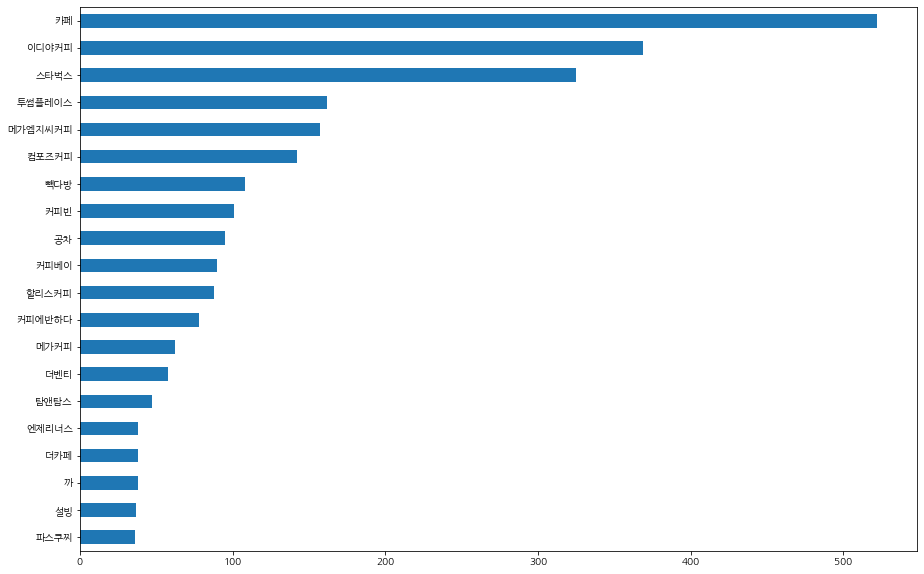

In [63]:
# 서울시 카페 브랜드 수 (상위 20개)
plt.figure(figsize=(15,10))
coffee_df['상호명'].value_counts()[:20].sort_values().plot(kind='barh')

In [64]:
# 상위 3개 브랜드 지역
top3_coffee = coffee_df.loc[coffee_df['상호명'].isin(['이디야커피', '스타벅스', '투썸플레이스'])]

In [96]:
# 시군구 그룹핑
top3_coffee_group = pd.DataFrame(top3_coffee.groupby(['시군구명','상호명'])['상호명'].count().reset_index(name ='매장수'))
top3_coffee_group

,시군구명,상호명,매장수
0,강남구,스타벅스,52
1,강남구,이디야커피,20
2,강남구,투썸플레이스,21
3,강동구,스타벅스,10
4,강동구,이디야커피,14
...,...,...,...
67,중구,이디야커피,11
68,중구,투썸플레이스,17
69,중랑구,스타벅스,4
70,중랑구,이디야커피,13


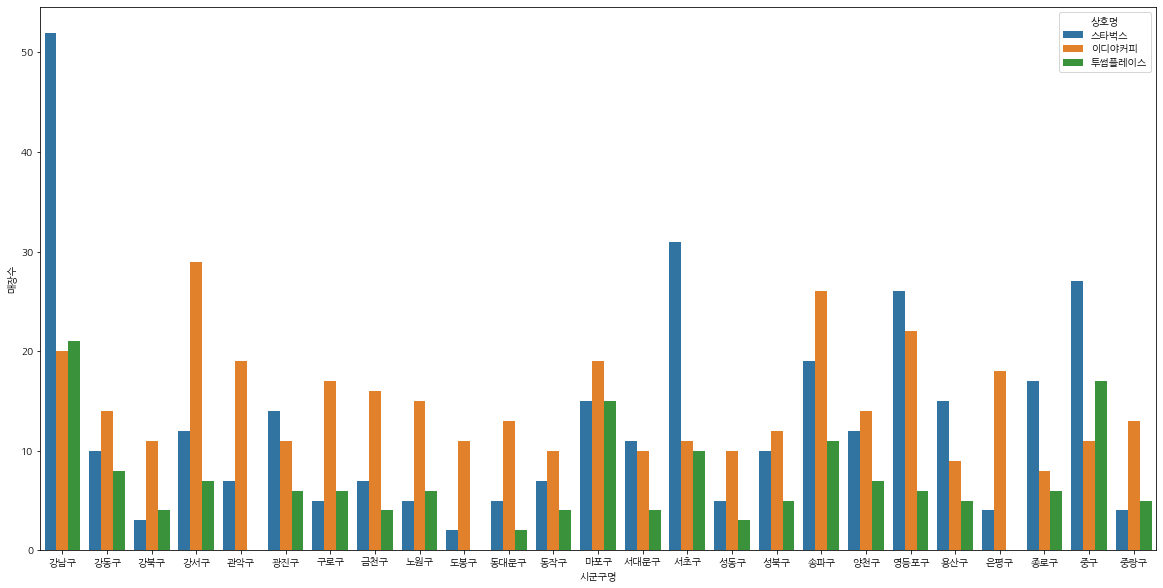

In [66]:
# Seaborn 시각화
plt.figure(figsize=(20,10))
sns.barplot(data=top3_coffee_group, x='시군구명', y='매장수', hue ='상호명')

> ###  **4-9-3. 상권 데이터 시각화**

> - 서울시 TOP 3 카페 브랜드를 **지도에 표현**해 보겠습니다.

In [68]:
# 상위 3개 브랜드 지역
top3_coffee = coffee_df.loc[coffee_df['상호명'].isin(['이디야커피', '스타벅스', '투썸플레이스'])]

In [169]:
# 지도 중심점 잡기
mean_lat = top3_coffee['위도'].mean()
mean_lon = top3_coffee['경도'].mean()
m = folium.Map(location=[mean_lat, mean_lon], zoom_start=11)

In [170]:
# 맵 크기 조절
f = folium.Figure(width=1000, height=500)
m.add_to(f)

In [171]:
# 구별 경계선 표시
import requests
import json

# 서울시 행정구역 GeoJSON 파일 로딩
soul_geo = 'https://raw.githubusercontent.com/southkorea/seoul-maps/master/kostat/2013/json/seoul_municipalities_geo_simple.json'
r = requests.get(soul_geo)
seoul_json = json.loads(r.content)

In [172]:
seoul_json

{'features': [{'geometry': {'coordinates': [[[127.11519584981606,
       37.557533180704915],
      [127.11879551821994, 37.557222485451305],
      [127.12146867175024, 37.55986003393365],
      [127.12435254630417, 37.56144246249796],
      [127.13593925898998, 37.56564793048277],
      [127.14930548011061, 37.56892250303897],
      [127.15511020940411, 37.57093642128295],
      [127.16683184366129, 37.57672487388627],
      [127.17038810813094, 37.576465605301046],
      [127.17607118428914, 37.57678573961056],
      [127.17905504160184, 37.57791388161732],
      [127.17747787800164, 37.57448983055031],
      [127.1781775408844, 37.571481967974336],
      [127.17995281860672, 37.569309661290504],
      [127.18122821955262, 37.56636089217979],
      [127.18169407550688, 37.56286338914073],
      [127.18408792330152, 37.55814280369575],
      [127.18350810324185, 37.550053002101485],
      [127.1852644795464, 37.54888592026534],
      [127.18480906237207, 37.545296888806796],
      [12

In [173]:
# 지도에 지역구 구분 표시
m.choropleth(geo_data = seoul_json, fill_color = 'gray')

In [174]:
m

In [156]:
# 스타벅스용 맵 생성
sb_map = folium.Map(location=[mean_lat, mean_lon], zoom_start=11)
f = folium.Figure(width=1000, height=500)
sb_map = sb_map.add_to(f)

In [157]:
# 지역구 구분 색상 표시
starbucks_count = top3_coffee_group.loc[top3_coffee_group['상호명']=='스타벅스']
sb_map.choropleth(geo_data = seoul_json,
                    data = starbucks_count,
                    columns = ['시군구명', '매장수'],
                    fill_color = 'YlGn',
                    color='gray',
                    key_on = 'properties.name',
                    fill_opacity=0.5,
                    line_opacity=0.5,
                    legend_name = '지역구 별 스타벅스 매장 수')

In [158]:
sb_map

In [161]:
# 지역구 구분 마커 표시
starbucks = top3_coffee_group.loc[top3_coffee_group['상호명']=='스타벅스']
starbucks_coord = top3_coffee.loc[top3_coffee['상호명']=='스타벅스']

for idx, row in starbucks_coord.iterrows():
    folium.Marker([row['위도'], row['경도']],
                  popup = '스타벅스',     # 마커 이름 입력
                  icon = folium.Icon(color='green')                  
                  ).add_to(sb_map)
sb_map

In [175]:
# TOP 3 커피점 마커표시
for idx, row in top3_coffee.iterrows():
    if row['상호명']=='이디야커피':
        popup = '이디야커피'
        icon_color = 'blue'
    elif row['상호명']=='스타벅스':
        popup = '스타벅스'
        icon_color = 'green'
    elif row['상호명']=='투썸플레이스':
        popup = '투썸플레이스'
        icon_color = 'red'
    folium.Marker([row['위도'], row['경도']],
                  popup = popup,                            # 마커 이름 입력
                  icon = folium.Icon(color=icon_color)      # 아이콘 색    
                  ).add_to(m)
m

Output hidden; open in https://colab.research.google.com to view.